In [1]:
# Written by Parameth Nganmoonkiew
# Last modified : 05/03/2024 16:04
import pandas as pd

# Instead of using data from Kemenne nam. station (SK0004A)
# I'll use data from Jeseniova. station (SK0048A) because
# datasets from this station cover around 98-99% of date and time.
# The distance between these two stations is not that long.
# According to google map, estimated time for travelling from
# Kemenne nam. station to Jaseniova. station is approximately
# 10 minutes.

# Note : Raw data contains concentration (ug/m^3)
uncleaned_df1 = pd.read_csv('SK_6001_45909_2018_timeseries.csv')
uncleaned_df2 = pd.read_csv('SK_6001_45909_2019_timeseries.csv')
uncleaned_df3 = pd.read_csv('SK_6001_45909_2020_timeseries.csv')
uncleaned_df4 = pd.read_csv('SK_6001_45909_2021_timeseries.csv')

In [100]:
uncleaned_df1.head(3).T

0  \
Countrycode                                                              SK   
Namespace                                                        SK.SHMU.AQ   
AirQualityNetwork                                                NET-SK001A   
AirQualityStation                                               STA-SK0048A   
AirQualityStationEoICode                                            SK0048A   
SamplingPoint                                         SPO-SK0048A_06001_100   
SamplingProcess                 SPP-SK_A_BETA_BAM1020_SK0048A_06001_100_100   
Sample                                          SPO_F-SK0048A_06001_100_100   
AirPollutant                                                          PM2.5   
AirPollutantCode          http://dd.eionet.europa.eu/vocabulary/aq/pollu...   
AveragingTime                                                          hour   
Concentration                                                        26.756   
UnitOfMeasurement                                                     µg/m3   
DatetimeBegin                                    2018-01-01 00:00:00 +01:00   
DatetimeEnd                                      2018-01-01 01:00:00 +01:00   
Validity                                                                  1   
Verification                                                              1   

                                                                          1  \
Countrycode                                                              SK   
Namespace                                                        SK.SHMU.AQ   
AirQualityNetwork                                                NET-SK001A   
AirQualityStation                                               STA-SK0048A   
AirQualityStationEoICode                                            SK0048A   
SamplingPoint                                         SPO-SK0048A_06001_100   
SamplingProcess                 SPP-SK_A_BETA_BAM1020_SK0048A_06001_100_100   
Sample                                          SPO_F-SK0048A_06001_100_100   
AirPollutant                                                          PM2.5   
AirPollutantCode          http://dd.eionet.europa.eu/vocabulary/aq/pollu...   
AveragingTime                                                          hour   
Concentration                                                        21.335   
UnitOfMeasurement                                                     µg/m3   
DatetimeBegin                                    2018-01-01 01:00:00 +01:00   
DatetimeEnd                                      2018-01-01 02:00:00 +01:00   
Validity                                                                  1   
Verification                                                              1   

                                                                          2  
Countrycode                                                              SK  
Namespace                                                        SK.SHMU.AQ  
AirQualityNetwork                                                NET-SK001A  
AirQualityStation                                               STA-SK0048A  
AirQualityStationEoICode                                            SK0048A  
SamplingPoint                                         SPO-SK0048A_06001_100  
SamplingProcess                 SPP-SK_A_BETA_BAM1020_SK0048A_06001_100_100  
Sample                                          SPO_F-SK0048A_06001_100_100  
AirPollutant                                                          PM2.5  
AirPollutantCode          http://dd.eionet.europa.eu/vocabulary/aq/pollu...  
AveragingTime                                                          hour  
Concentration                                                        22.605  
UnitOfMeasurement                                                     µg/m3  
DatetimeBegin                                    2018-01-01 02:00:00 +01:00  
DatetimeEnd                                      2018-01-0

In [3]:
cleaned_df1 = pd.DataFrame({'Concentration':uncleaned_df1['Concentration'], 'DateTime':uncleaned_df1['DatetimeBegin']})
cleaned_df2 = pd.DataFrame({'Concentration':uncleaned_df2['Concentration'], 'DateTime':uncleaned_df2['DatetimeBegin']})
cleaned_df3 = pd.DataFrame({'Concentration':uncleaned_df3['Concentration'], 'DateTime':uncleaned_df3['DatetimeBegin']})
cleaned_df4 = pd.DataFrame({'Concentration':uncleaned_df4['Concentration'], 'DateTime':uncleaned_df4['DatetimeBegin']})

In [4]:
print('Shape of Data:', cleaned_df1.shape[0], 'rows,', cleaned_df1.shape[1], 'cols.')
print('\nDatatypes contains in dataset:\n{}'.format(cleaned_df1.dtypes))
print('--------------------------------------------')

print('Shape of Data:', cleaned_df2.shape[0], 'rows,', cleaned_df2.shape[1], 'cols.')
print('\nDatatypes contains in dataset:\n{}'.format(cleaned_df2.dtypes))
print('--------------------------------------------')

print('Shape of Data:', cleaned_df3.shape[0], 'rows,', cleaned_df3.shape[1], 'cols.')
print('\nDatatypes contains in dataset:\n{}'.format(cleaned_df3.dtypes))
print('--------------------------------------------')

print('Shape of Data:', cleaned_df4.shape[0], 'rows,', cleaned_df4.shape[1], 'cols.')
print('\nDatatypes contains in dataset:\n{}'.format(cleaned_df4.dtypes))
print('--------------------------------------------')
cleaned_df4.head(3)

Shape of Data: 8596 rows, 2 cols.

Datatypes contains in dataset:
Concentration    float64
DateTime          object
dtype: object
--------------------------------------------
Shape of Data: 8678 rows, 2 cols.

Datatypes contains in dataset:
Concentration    float64
DateTime          object
dtype: object
--------------------------------------------
Shape of Data: 8723 rows, 2 cols.

Datatypes contains in dataset:
Concentration    float64
DateTime          object
dtype: object
--------------------------------------------
Shape of Data: 8626 rows, 2 cols.

Datatypes contains in dataset:
Concentration    float64
DateTime          object
dtype: object
--------------------------------------------


Concentration                    DateTime
0         23.285  2021-01-01 00:00:00 +01:00
1         24.388  2021-01-01 01:00:00 +01:00
2         19.622  2021-01-01 02:00:00 +01:00

In [5]:
def calculate_AQI(x):
    # Good
    if x < 12.1:
        xi, xj = 0, 12.0
        ii, ij = 0, 50
    # Moderate
    elif x < 35.5:
        xi, xj = 12.0, 35.4
        ii, ij = 51, 100
    # Unhealthy for sensitive group
    elif x < 55.5:
        xi, xj = 35.5, 55.4
        ii, ij = 101, 150
    # Unhealthy
    elif x < 150.5:
        xi, xj = 55.5, 150.4
        ii, ij = 151, 200
    # Very unhealthy
    elif x < 250.5:
        xi, xj = 150.5, 250.4
        ii, ij = 201, 300
    # Hazadous
    elif x >= 250.5:
        xi, xj = 0, 250.5
        ii, ij = 0, 250.5
    AQI = (((ij - ii)/(xj-xi))*(x-xi))+ii
    return AQI

In [6]:
cleaned_df1['Date'] = pd.to_datetime(cleaned_df1['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%d/%m/%Y')
cleaned_df1['Time'] = pd.to_datetime(cleaned_df1['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%H:%M')
cleaned_df1['DateTime'] = pd.to_datetime(cleaned_df1['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%d/%m/%Y %H:%M')
cleaned_df1.rename(columns = {'Concentration':'PM2.5_conc_med'}, inplace = True)

cleaned_df2['Date'] = pd.to_datetime(cleaned_df2['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%d/%m/%Y')
cleaned_df2['Time'] = pd.to_datetime(cleaned_df2['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%H:%M')
cleaned_df2['DateTime'] = pd.to_datetime(cleaned_df2['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%d/%m/%Y %H:%M')
cleaned_df2.rename(columns = {'Concentration':'PM2.5_conc_med'}, inplace = True)

cleaned_df3['Date'] = pd.to_datetime(cleaned_df3['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%d/%m/%Y')
cleaned_df3['Time'] = pd.to_datetime(cleaned_df3['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%H:%M')
cleaned_df3['DateTime'] = pd.to_datetime(cleaned_df3['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%d/%m/%Y %H:%M')
cleaned_df3.rename(columns = {'Concentration':'PM2.5_conc_med'}, inplace = True)

cleaned_df4['Date'] = pd.to_datetime(cleaned_df4['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%d/%m/%Y')
cleaned_df4['Time'] = pd.to_datetime(cleaned_df4['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%H:%M')
cleaned_df4['DateTime'] = pd.to_datetime(cleaned_df4['DateTime'], format='%Y-%m-%d %H:%M:%S +01:00').dt.strftime('%d/%m/%Y %H:%M')
cleaned_df4.rename(columns = {'Concentration':'PM2.5_conc_med'}, inplace = True)

cleaned_df1['PM2.5_AQI'] = cleaned_df1['PM2.5_conc_med'].apply(lambda x: calculate_AQI(x))
cleaned_df1 = cleaned_df1[['DateTime', 'Date', 'Time', 'PM2.5_conc_med', 'PM2.5_AQI']]

cleaned_df2['PM2.5_AQI'] = cleaned_df2['PM2.5_conc_med'].apply(lambda x: calculate_AQI(x))
cleaned_df2 = cleaned_df2[['DateTime', 'Date', 'Time', 'PM2.5_conc_med', 'PM2.5_AQI']]

cleaned_df3['PM2.5_AQI'] = cleaned_df3['PM2.5_conc_med'].apply(lambda x: calculate_AQI(x))
cleaned_df3 = cleaned_df3[['DateTime', 'Date', 'Time', 'PM2.5_conc_med', 'PM2.5_AQI']]

cleaned_df4['PM2.5_AQI'] = cleaned_df4['PM2.5_conc_med'].apply(lambda x: calculate_AQI(x))
cleaned_df4 = cleaned_df4[['DateTime', 'Date', 'Time', 'PM2.5_conc_med', 'PM2.5_AQI']]


print('Sample data of cleaned_df1:\n{}'.format(cleaned_df1.head(3)))
print('--------------------------------------------')
print('Sample data of cleaned_df1:\n{}'.format(cleaned_df2.head(3)))
print('--------------------------------------------')
print('Sample data of cleaned_df1:\n{}'.format(cleaned_df3.head(3)))
print('--------------------------------------------')
print('Sample data of cleaned_df1:\n{}'.format(cleaned_df4.head(3)))

Sample data of cleaned_df1:
           DateTime        Date   Time  PM2.5_conc_med  PM2.5_AQI
0  01/01/2018 00:00  01/01/2018  00:00          26.756  81.899316
1  01/01/2018 01:00  01/01/2018  01:00          21.335  70.547650
2  01/01/2018 02:00  01/01/2018  02:00          22.605  73.207051
--------------------------------------------
Sample data of cleaned_df1:
           DateTime        Date   Time  PM2.5_conc_med  PM2.5_AQI
0  01/01/2019 00:00  01/01/2019  00:00         26.8460  82.087778
1  01/01/2019 01:00  01/01/2019  01:00          8.8510  36.879167
2  01/01/2019 02:00  01/01/2019  02:00          8.3432  34.763333
--------------------------------------------
Sample data of cleaned_df1:
           DateTime        Date   Time  PM2.5_conc_med  PM2.5_AQI
0  01/01/2020 00:00  01/01/2020  00:00          14.369  55.960726
1  01/01/2020 01:00  01/01/2020  01:00          18.890  65.427778
2  01/01/2020 02:00  01/01/2020  02:00          27.304  83.046838
----------------------------------

In [9]:
# Write Date Frame into excel file.
with pd.ExcelWriter('cleaned_median_Bratislava_Jeseniova.xlsx', mode='w', engine='openpyxl') as writtenFile:
    cleaned_df1.to_excel(writtenFile, sheet_name='2018', index=False)
    cleaned_df2.to_excel(writtenFile, sheet_name='2019', index=False)
    cleaned_df3.to_excel(writtenFile, sheet_name='2020', index=False)
    cleaned_df4.to_excel(writtenFile, sheet_name='2021', index=False)

In [ ]:
# I don't remember the purpose of this cell.

# Calculate AQI-US
df = pd.read_excel('cleaned_median_Bratislava_Jeseniova.xlsx')
df['PM2.5_AQI'] = df['PM2.5'].apply(lambda x: calculate_AQI(x))

# Store into new sheet named AQI
with pd.ExcelWriter('cleaned_median_Bratislava_Jeseniova.xlsx', mode='w', engine='openpyxl') as writtenFile:
    df.to_excel(writtenFile, sheet_name='AQI_Data', index=False)

In [1]:
# If you've cleaned the data, run this instead.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('cleaned_median_Bratislava_Jeseniova.xlsx', sheet_name=['2018','2019','2020','2021',])

df2018 = pd.DataFrame(data=df['2018'])
df2019 = pd.DataFrame(data=df['2019'])
df2020 = pd.DataFrame(data=df['2020'])
df2021 = pd.DataFrame(data=df['2021'])
del df

In [3]:
# Each dataset should has 8760 rows (for 365 days) or 
# 8784 rows (for 366 days) for leap year.
# So I've concluded that there are missing data.
# Leap year : 2020, Non-leap year : 2018, 2019, 2021

print('> Statistical info of year 2018 -----------------------\n{}\n'.\
      format(df2018.describe().T))
print('> Statistical info of year 2019 -----------------------\n{}\n'.\
      format(df2019.describe().T))
print('> Statistical info of year 2020 (Leap Year) -----------------------\n{}\n'.\
      format(df2020.describe().T))
print('> Statistical info of year 2021 -----------------------\n{}\n'.\
      format(df2021.describe().T))

> Statistical info of year 2018 -----------------------
                 count       mean        std       min        25%        50%  \
PM2.5_conc_med  8596.0  15.510329  12.749598  0.012100   7.003525  11.215000   
PM2.5_AQI       8596.0  52.413097  31.538667  0.050417  29.181354  46.729167   

                      75%         max  
PM2.5_conc_med  20.593250  122.400000  
PM2.5_AQI       68.994412  185.542677  

> Statistical info of year 2019 -----------------------
                 count       mean        std       min        25%       50%  \
PM2.5_conc_med  8678.0  12.021696   9.994901  0.060500   5.284125   9.05550   
PM2.5_AQI       8678.0  42.993077  27.516368  0.252083  22.017187  37.73125   

                      75%         max  
PM2.5_conc_med  15.752000   96.695000  
PM2.5_AQI       58.856752  172.270337  

> Statistical info of year 2020 (Leap Year) -----------------------
                 count       mean        std       min       25%      50%  \
PM2.5_conc_med  8723.0

In [4]:
print(df2018.info(), '\n')
print(df2019.info(), '\n')
print(df2020.info(), '\n')
print(df2021.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8596 entries, 0 to 8595
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8596 non-null   object 
 1   Date            8596 non-null   object 
 2   Time            8596 non-null   object 
 3   PM2.5_conc_med  8596 non-null   float64
 4   PM2.5_AQI       8596 non-null   float64
dtypes: float64(2), object(3)
memory usage: 335.9+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8678 entries, 0 to 8677
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8678 non-null   object 
 1   Date            8678 non-null   object 
 2   Time            8678 non-null   object 
 3   PM2.5_conc_med  8678 non-null   float64
 4   PM2.5_AQI       8678 non-null   float64
dtypes: float64(2), object(3)
memory usage: 339.1+ KB
None 

<class 'pandas.core.frame.DataFrame'

In [15]:
print('Max AQI value in year 2018 -----------------------')
print(df2018[df2018['PM2.5_AQI'] == df2018['PM2.5_AQI'].max()].\
      drop(['Date', 'Time'], axis=1))
print('\nMax AQI value in year 2019 -----------------------')
print(df2019[df2019['PM2.5_AQI'] == df2019['PM2.5_AQI'].max()].\
      drop(['Date', 'Time'], axis=1))
print('\nMax AQI value in year 2020 -----------------------')
print(df2020[df2020['PM2.5_AQI'] == df2020['PM2.5_AQI'].max()].\
      drop(['Date', 'Time'], axis=1))
print('\nMax AQI value in year 2021 -----------------------')
print(df2021[df2021['PM2.5_AQI'] == df2021['PM2.5_AQI'].max()].\
      drop(['Date', 'Time'], axis=1))

Max AQI value in year 2018 -----------------------
              DateTime  PM2.5_conc_med   PM2.5_AQI
1409  04/03/2018 07:00           122.4  185.542677

Max AQI value in year 2019 -----------------------
              DateTime  PM2.5_conc_med   PM2.5_AQI
2093  29/03/2019 17:00          96.695  172.270337

Max AQI value in year 2020 -----------------------
             DateTime  PM2.5_conc_med   PM2.5_AQI
210  09/01/2020 19:00          66.928  156.900653

Max AQI value in year 2021 -----------------------
             DateTime  PM2.5_conc_med   PM2.5_AQI
658  10/02/2021 20:00          84.117  165.775901


In [16]:
bins = [-1, 15.6, 40.6, 65.6, 150.6, 250.6,400]
labels = ['Good', 'Moderate', 'Unhealthy for sensitive people',\
            'Unhealty', 'Very Unhealthy', 'Hazardous']
df2018['AQI_Levels'] = pd.cut(df2018['PM2.5_conc_med'], bins=bins, labels=labels)
df2019['AQI_Levels'] = pd.cut(df2019['PM2.5_conc_med'], bins=bins, labels=labels)
df2020['AQI_Levels'] = pd.cut(df2020['PM2.5_conc_med'], bins=bins, labels=labels)
df2021['AQI_Levels'] = pd.cut(df2021['PM2.5_conc_med'], bins=bins, labels=labels)

In [17]:
print('Count of each AQI level in year 2018 -----------------------')
print(df2018.groupby(by=['AQI_Levels'])[['PM2.5_AQI']].count().transpose())
print('\nCount of each AQI level in year 2019 -----------------------')
print(df2019.groupby(by=['AQI_Levels'])[['PM2.5_AQI']].count().transpose())
print('\nCount of each AQI level in year 2020 -----------------------')
print(df2020.groupby(by=['AQI_Levels'])[['PM2.5_AQI']].count().transpose())
print('\nCount of each AQI level in year 2021 -----------------------')
print(df2021.groupby(by=['AQI_Levels'])[['PM2.5_AQI']].count().transpose())

Count of each AQI level in year 2018 -----------------------
AQI_Levels  Good  Moderate  Unhealthy for sensitive people  Unhealty  \
PM2.5_AQI   5623      2511                             409        53   

AQI_Levels  Very Unhealthy  Hazardous  
PM2.5_AQI                0          0  

Count of each AQI level in year 2019 -----------------------
AQI_Levels  Good  Moderate  Unhealthy for sensitive people  Unhealty  \
PM2.5_AQI   6474      1993                             199        12   

AQI_Levels  Very Unhealthy  Hazardous  
PM2.5_AQI                0          0  

Count of each AQI level in year 2020 -----------------------
AQI_Levels  Good  Moderate  Unhealthy for sensitive people  Unhealty  \
PM2.5_AQI   6422      2207                              93         1   

AQI_Levels  Very Unhealthy  Hazardous  
PM2.5_AQI                0          0  

Count of each AQI level in year 2021 -----------------------
AQI_Levels  Good  Moderate  Unhealthy for sensitive people  Unhealty  \
PM2.5_

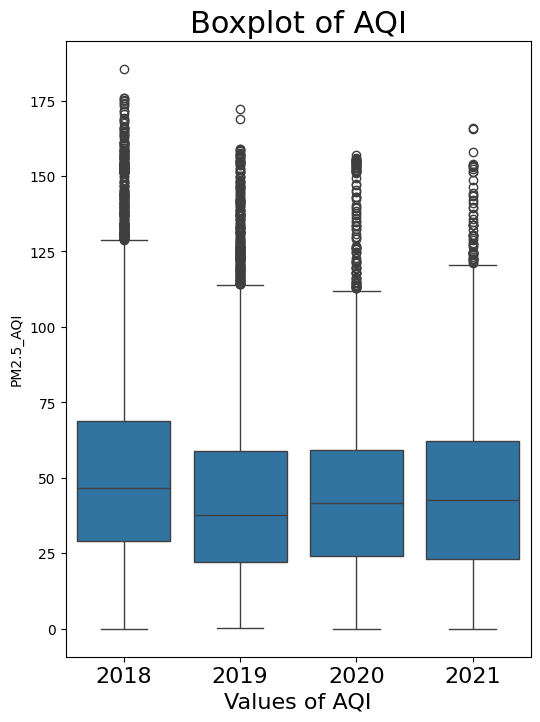

In [18]:
# Prepare data for boxplot
quantiles = {'2018': df2018['PM2.5_AQI'].quantile([.25,.5,.75]).tolist(),
            '2019': df2019['PM2.5_AQI'].quantile([.25,.5,.75]).tolist(),
            '2020': df2020['PM2.5_AQI'].quantile([.25,.5,.75]).tolist(),
            '2021': df2021['PM2.5_AQI'].quantile([.25,.5,.75]).tolist()}
merged_df = pd.concat([df2018[['PM2.5_AQI']].assign(Year=2018),\
                       df2019[['PM2.5_AQI']].assign(Year=2019),\
                       df2020[['PM2.5_AQI']].assign(Year=2020),\
                       df2021[['PM2.5_AQI']].assign(Year=2021)])

# Boxplot determines whether data contains outliers or not.
fig, ax = plt.subplots(figsize=(6,8))

sns.boxplot(ax=ax, x='Year', y='PM2.5_AQI', data=merged_df)
ax.axes.set_title('Boxplot of AQI', fontsize=22, loc='center')
ax.set_xlabel('Values of AQI', fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)

plt.show()

In [19]:
print(df2018['PM2.5_conc_med'].max())
print(df2018['PM2.5_AQI'].max())

122.4
185.5426765015806


In [20]:
# Palette for each level in AQI
palette=['green','yellow','orange','red','purple','maroon']

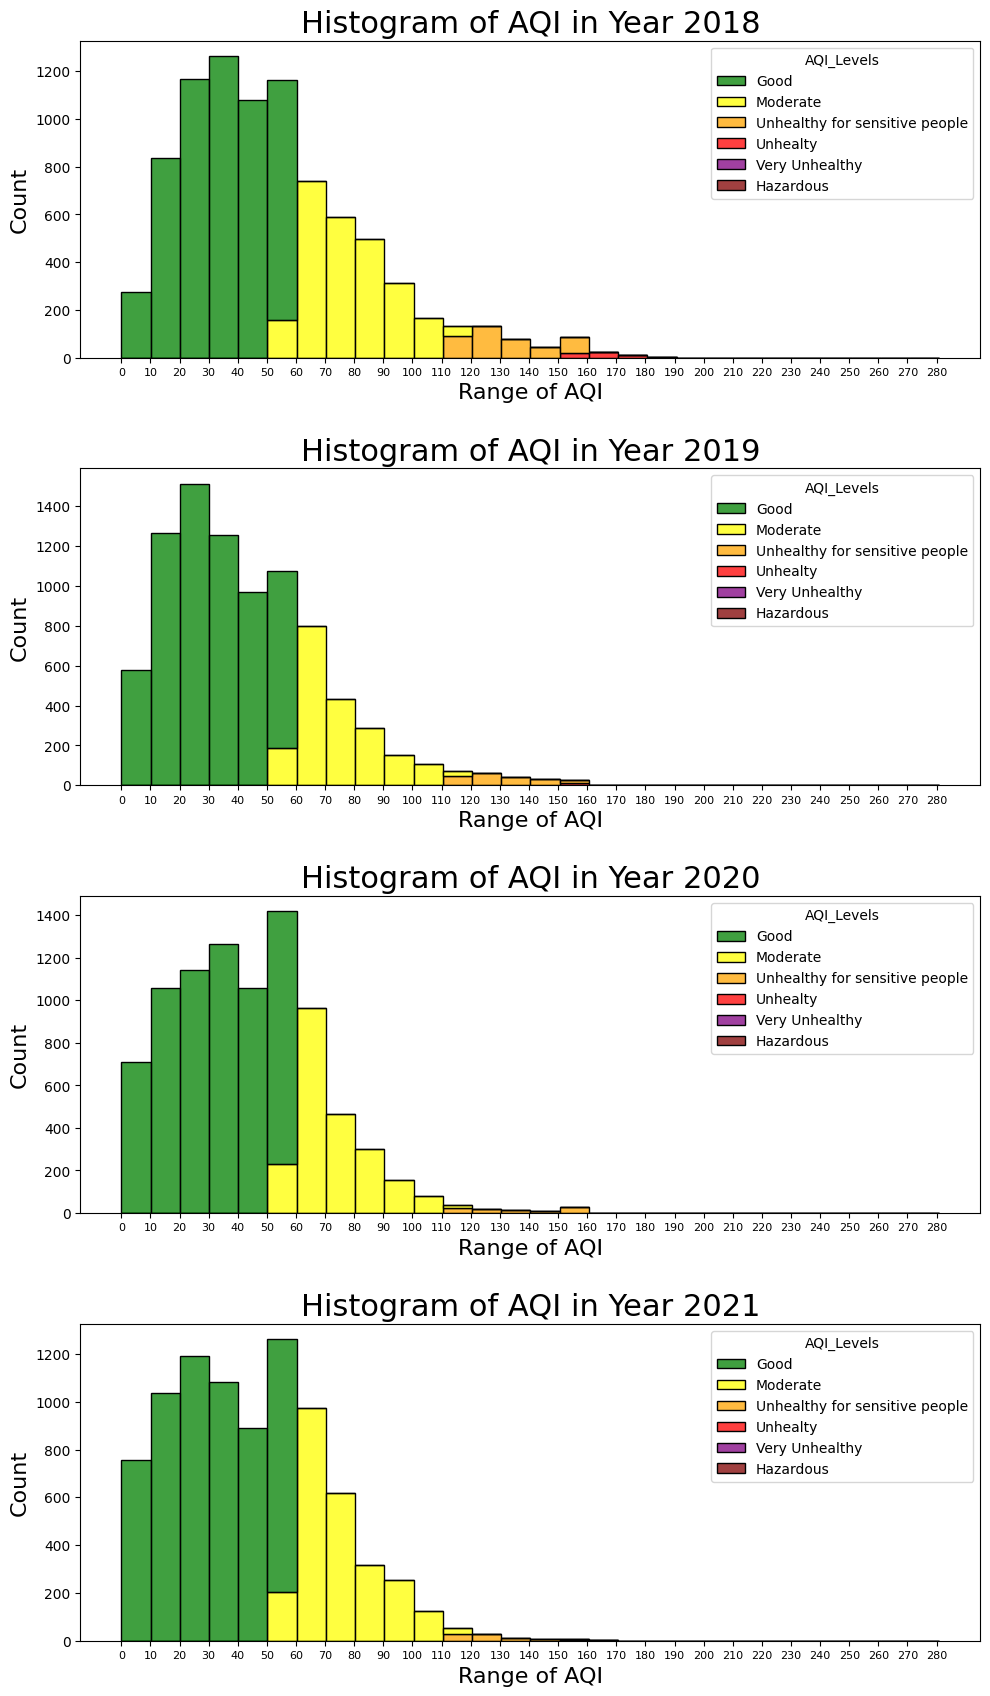

In [21]:
# Histogram to explore distribution of AQI values
xtick_labels_hist = [i for i in range(0,281,10)]
merged_df = [df2018, df2019, df2020, df2021]

fig, axes = plt.subplots(4,1,figsize=(12,16))

axes[0].axes.set_title('Histogram of AQI in Year 2018', fontsize=22)
axes[1].axes.set_title('Histogram of AQI in Year 2019', fontsize=22)
axes[2].axes.set_title('Histogram of AQI in Year 2020', fontsize=22)
axes[3].axes.set_title('Histogram of AQI in Year 2021', fontsize=22)

for i in range(0,4): 
    sns.histplot(ax=axes[i], data=merged_df[i], x='PM2.5_AQI', binwidth=10, \
             binrange=(0,281), multiple='stack', hue='AQI_Levels', \
             palette=palette)
    
    axes[i].set_xlabel('Range of AQI', fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)
    axes[i].xaxis.set_tick_params(labelsize=8)

plt.setp(axes, xticks = xtick_labels_hist, xticklabels = xtick_labels_hist)
plt.xticks(xtick_labels_hist, xtick_labels_hist)
plt.subplots_adjust(top = 1 , bottom = 0, left=0.15,\
                    hspace=0.35, wspace=0.25)
plt.show()

In [7]:
from itertools import product
from statsmodels.tsa.seasonal import STL

In [8]:
def dt_for_merge(year, dates):
    times = pd.date_range(start='00:00', periods=24, freq='1H', name='Time').time
    oneDay_times = pd.DataFrame({'Time':times})
    oneDay_times['Time'] = pd.to_datetime(oneDay_times['Time'], format='%H:%M:%S').dt.strftime('%H:%M')
    
    dates = pd.date_range(start=f'01/01/{year}', periods=dates, freq='D').date
    oneMonth = pd.DataFrame({'Date':dates})
    oneMonth['Date'] = pd.to_datetime(oneMonth['Date'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')
    
    union_dateTime = pd.DataFrame(list(product(oneMonth['Date'], oneDay_times['Time'])), columns=['Date', 'Time'])
    return union_dateTime

In [9]:
def STL_process(df):
    imputed_indices = df[df['PM2.5_AQI'].isnull()].index
    stl_res = STL(df['PM2.5_AQI'].interpolate(), period=365)
    stl_res = stl_res.fit()
    df_deseasonalised = df['PM2.5_AQI'] - stl_res.seasonal
    df_dess_imputed = df_deseasonalised.interpolate(method='linear')
    df_imputed = df_dess_imputed + stl_res.seasonal
    df.loc[imputed_indices, 'PM2.5_AQI'] = df_imputed[imputed_indices]
    return stl_res

In [10]:
merged2018 = pd.merge(df2018, dt_for_merge(2018, 365), how='right', left_on=['Date', 'Time'], right_on=['Date','Time'])
merged2019 = pd.merge(df2019, dt_for_merge(2019, 365), how='right', left_on=['Date', 'Time'], right_on=['Date','Time'])
merged2020 = pd.merge(df2020, dt_for_merge(2020, 366), how='right', left_on=['Date', 'Time'], right_on=['Date','Time'])
merged2021 = pd.merge(df2021, dt_for_merge(2021, 365), how='right', left_on=['Date', 'Time'], right_on=['Date','Time'])

print('\nBefore Process using STL:')
print('Sum of null rows 2018:\n', pd.DataFrame(merged2018.isna().sum()).T)
print('Sum of null rows 2019:\n', pd.DataFrame(merged2019.isna().sum()).T)
print('Sum of null rows 2020:\n', pd.DataFrame(merged2020.isna().sum()).T)
print('Sum of null rows 2021:\n', pd.DataFrame(merged2021.isna().sum()).T)

merged2018_stl = STL_process(merged2018)
merged2019_stl = STL_process(merged2019)
merged2020_stl = STL_process(merged2020)
merged2021_stl = STL_process(merged2021)

merged2018['DateTime'] = merged2018['Date'] + ' ' + merged2018['Time']
merged2019['DateTime'] = merged2019['Date'] + ' ' + merged2019['Time']
merged2020['DateTime'] = merged2020['Date'] + ' ' + merged2020['Time']
merged2021['DateTime'] = merged2021['Date'] + ' ' + merged2021['Time']


Before Process using STL:
Sum of null rows 2018:
    DateTime  Date  Time  PM2.5_conc_med  PM2.5_AQI
0       164     0     0             164        164
Sum of null rows 2019:
    DateTime  Date  Time  PM2.5_conc_med  PM2.5_AQI
0        82     0     0              82         82
Sum of null rows 2020:
    DateTime  Date  Time  PM2.5_conc_med  PM2.5_AQI
0        61     0     0              61         61
Sum of null rows 2021:
    DateTime  Date  Time  PM2.5_conc_med  PM2.5_AQI
0       134     0     0             134        134


In [11]:
print('\nAfter Process using STL:')
print('Sum of null rows 2018:\n', pd.DataFrame(merged2018.isna().sum()).T)
print('Sum of null rows 2019:\n', pd.DataFrame(merged2019.isna().sum()).T)
print('Sum of null rows 2020:\n', pd.DataFrame(merged2020.isna().sum()).T)
print('Sum of null rows 2021:\n', pd.DataFrame(merged2021.isna().sum()).T)


After Process using STL:
Sum of null rows 2018:
    DateTime  Date  Time  PM2.5_conc_med  PM2.5_AQI
0         0     0     0             164          0
Sum of null rows 2019:
    DateTime  Date  Time  PM2.5_conc_med  PM2.5_AQI
0         0     0     0              82          0
Sum of null rows 2020:
    DateTime  Date  Time  PM2.5_conc_med  PM2.5_AQI
0         0     0     0              61          0
Sum of null rows 2021:
    DateTime  Date  Time  PM2.5_conc_med  PM2.5_AQI
0         0     0     0             134          0


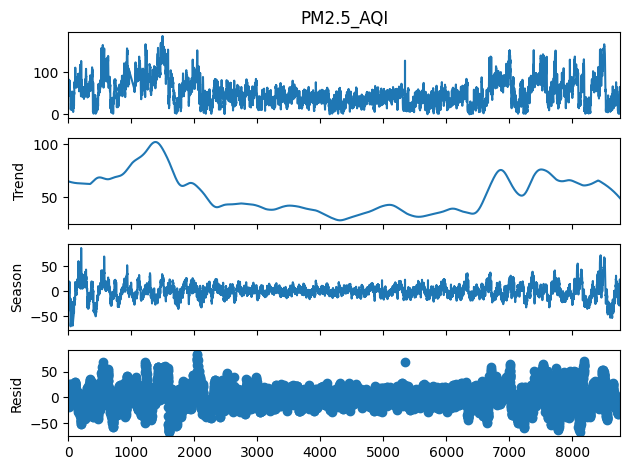

In [31]:
merged2018_stl.plot()
plt.show()

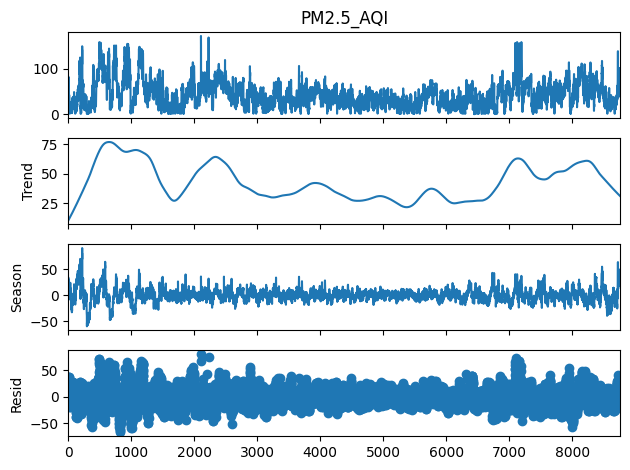

In [32]:
merged2019_stl.plot()
plt.show()

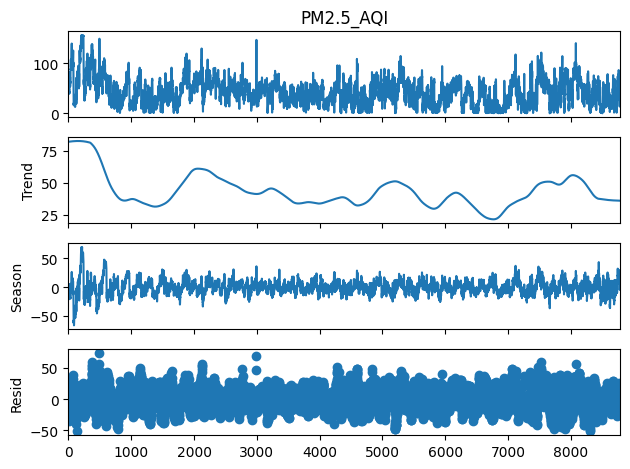

In [33]:
merged2020_stl.plot()
plt.show()

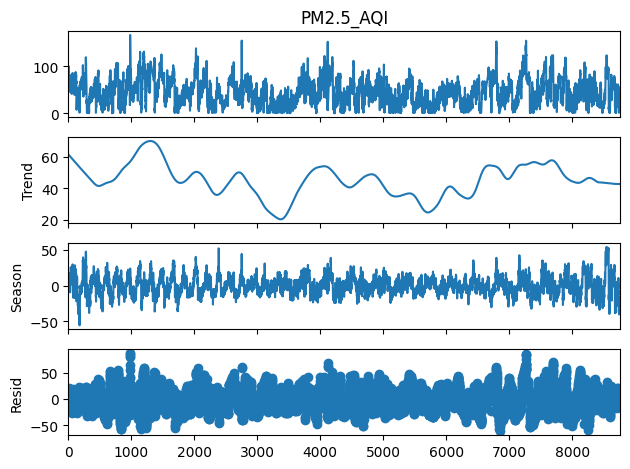

In [34]:
merged2021_stl.plot()
plt.show()

In [12]:
# For plotting multiple
df2018 = merged2018.copy()
df2019 = merged2019.copy()
df2020 = merged2020.copy()
df2021 = merged2021.copy()

df2018['DateTime_ExceptYear'] = pd.to_datetime(df2018['DateTime'], format='%d/%m/%Y %H:%M').dt.strftime('%d/%m %H:%M')
df2019['DateTime_ExceptYear'] = pd.to_datetime(df2019['DateTime'], format='%d/%m/%Y %H:%M').dt.strftime('%d/%m %H:%M')
df2020['DateTime_ExceptYear'] = pd.to_datetime(df2020['DateTime'], format='%d/%m/%Y %H:%M').dt.strftime('%d/%m %H:%M')
df2021['DateTime_ExceptYear'] = pd.to_datetime(df2021['DateTime'], format='%d/%m/%Y %H:%M').dt.strftime('%d/%m %H:%M')

In [13]:
# resize x-ticks to fit df['Date and Time']'s length
xticks_list = list()
vlines_list = list()
for dateTime in df2018['DateTime'].values.tolist():
    if (str(dateTime)[-5:len(str(dateTime))] == '00:00'): 
        xticks_list.append("{}\n{}".format(str(dateTime)[0:2],str(dateTime)[3:5]))
        vlines_list.append(str(dateTime))
    else:
        xticks_list.append(' ')   

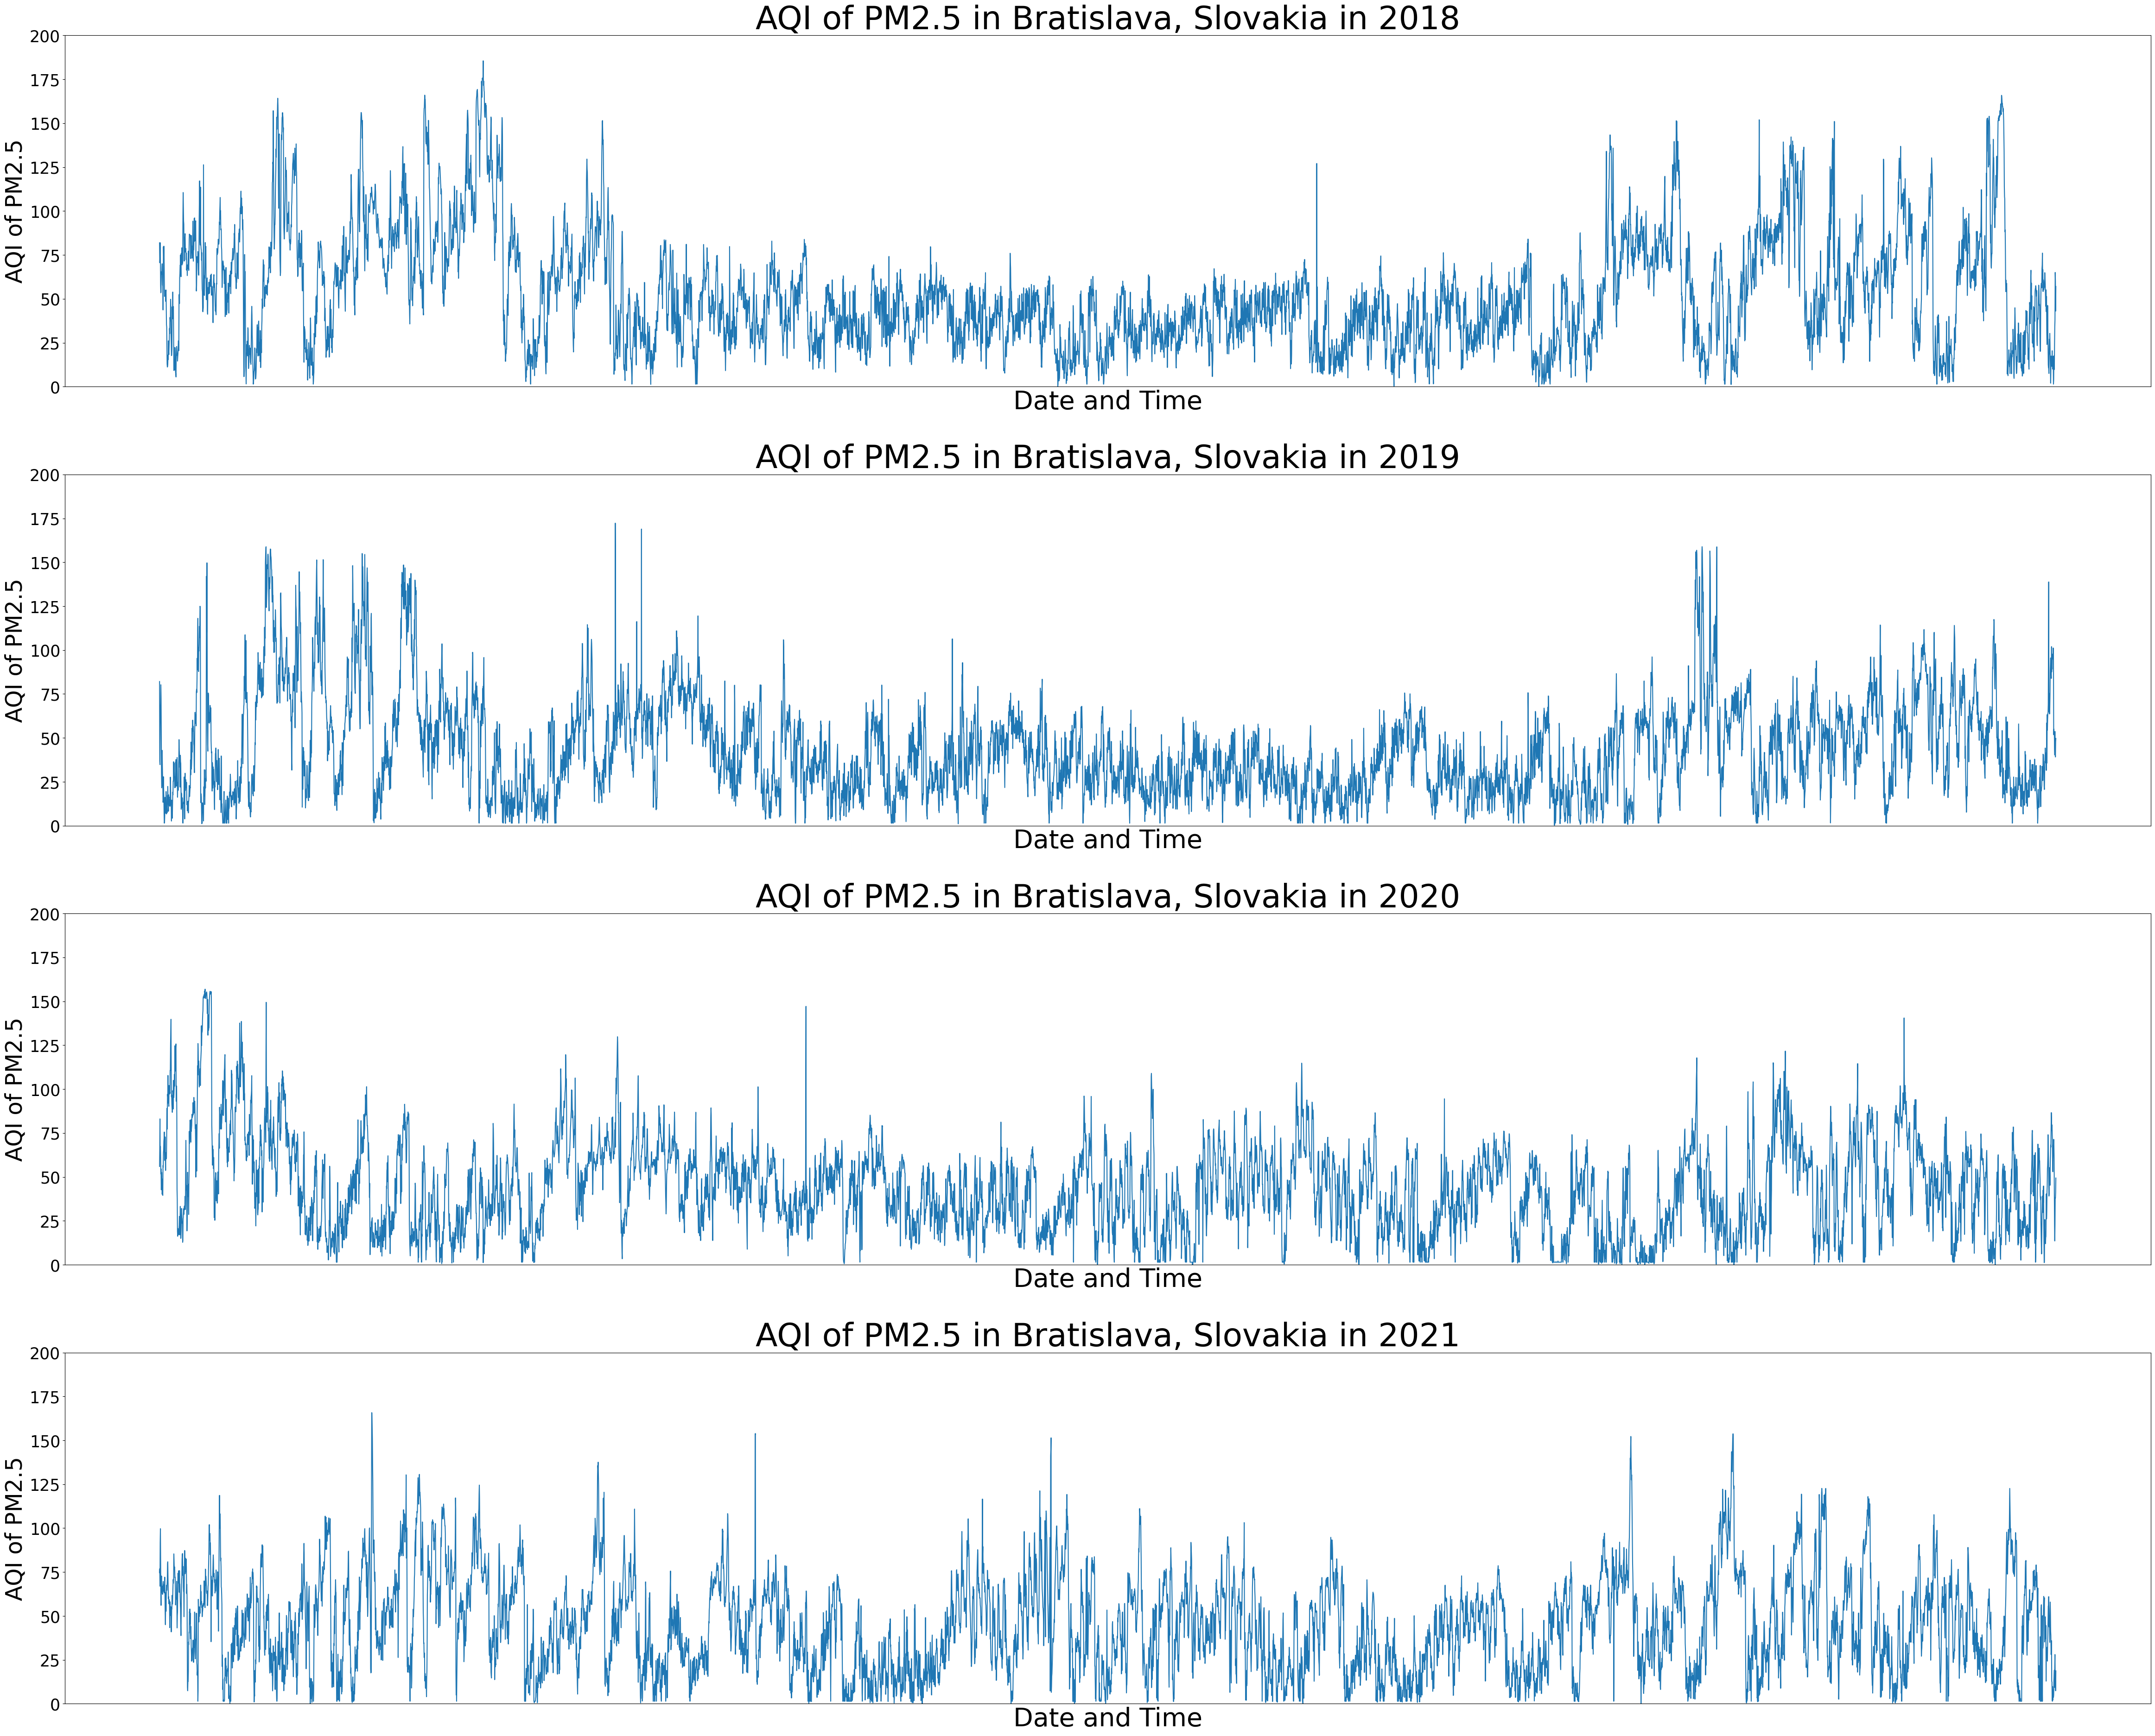

In [14]:
import warnings
warnings.filterwarnings('ignore')

# For easy coding
merged_df = [df2018, df2019, df2020, df2021]
years = ['2018','2019','2020','2021']

# Plotting Time Series Data
fig, axes = plt.subplots(4,1, figsize=(60,36))

for i in range(0,4):
    sns.lineplot(ax=axes[i], data=merged_df[i], x='DateTime', y='PM2.5_AQI')

    axes[i].set_title(f'AQI of PM2.5 in Bratislava, Slovakia in 20{18+i}', fontsize=50)
    axes[i].set_xlabel('Date and Time', fontsize=40)
    axes[i].set_ylabel('AQI of PM2.5', fontsize=35)
    axes[i].yaxis.set_tick_params(labelsize=25)
    axes[i].set_ylim(0,200)
    axes[i].set_xticks([])

plt.xticks(visible=False)
plt.subplots_adjust(top = 1 , bottom = 0, left=0.15,\
                    hspace=0.25, wspace=0.25)
plt.show()

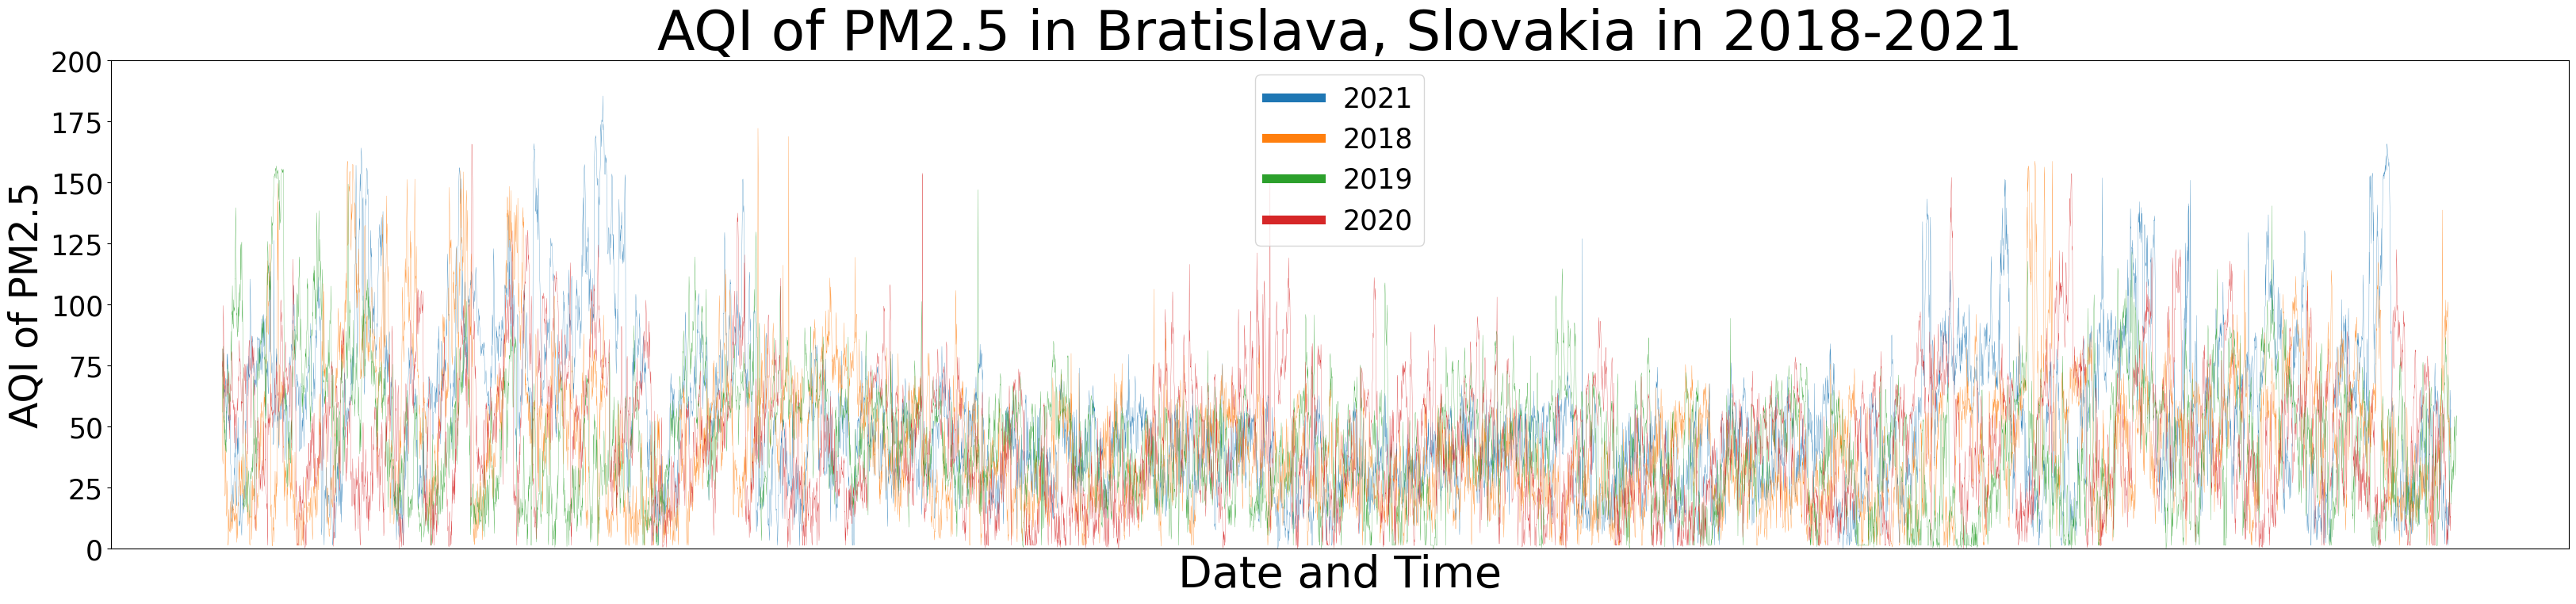

In [15]:
import warnings
warnings.filterwarnings('ignore')

# For easy coding
merged_df = [df2018, df2019, df2020, df2021]
years = ['2018','2019','2020','2021']

# Plotting Time Series Data
fig = plt.figure(figsize=(40,8))

for i in range(0,4):
    sns.lineplot(data=merged_df[i], x='DateTime_ExceptYear', y='PM2.5_AQI',\
                linewidth=0.2, label=years[i-1])

plt.title(f'AQI of PM2.5 in Bratislava, Slovakia in 2018-2021', fontsize=50)
plt.xlabel('Date and Time', fontsize=40)
plt.ylabel('AQI of PM2.5', fontsize=35)
plt.tick_params(axis='y', labelsize=25)

leg = plt.legend(fontsize=25)
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xticks([])
plt.xticks(visible=False)
plt.ylim(0,200)
plt.show()

In [16]:
# Traning the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

mod_df = df2018.append(df2019, ignore_index=True)
mod_df = mod_df.append(df2020, ignore_index=True)
#mod_df = mod_df.append(df2021, ignore_index=True)

encoder = LabelEncoder()
encoder.fit(mod_df['DateTime_ExceptYear'])
encoded_str = list(encoder.transform(mod_df['DateTime_ExceptYear']).reshape(-1, 1))

#train_x, test_x = train_test_split(encoded_str, test_size = 0.15)
#train_y, test_y= train_test_split(mod_df['PM2.5_AQI'], test_size = 0.15)

rf = RandomForestRegressor()
rf.fit(encoded_str, mod_df['PM2.5_AQI'])

preds = rf.predict(encoder.transform(df2021['DateTime_ExceptYear']).reshape(-1, 1))

In [17]:
import numpy as np

df2021_np = df2021['PM2.5_AQI'].to_numpy()

mse = np.sum((preds - df2021_np)**2)/len(preds)
rmse = np.sqrt(np.sum((preds - df2021_np)**2)/len(preds))
mae = np.sum(np.absolute(preds - df2021_np))/len(preds)

print('MSE : ', mse)
print('RMSE : ', rmse)
print('MAE : ', mae)

MSE :  979.5032581429323
RMSE :  31.297016761073767
MAE :  25.058716698162055


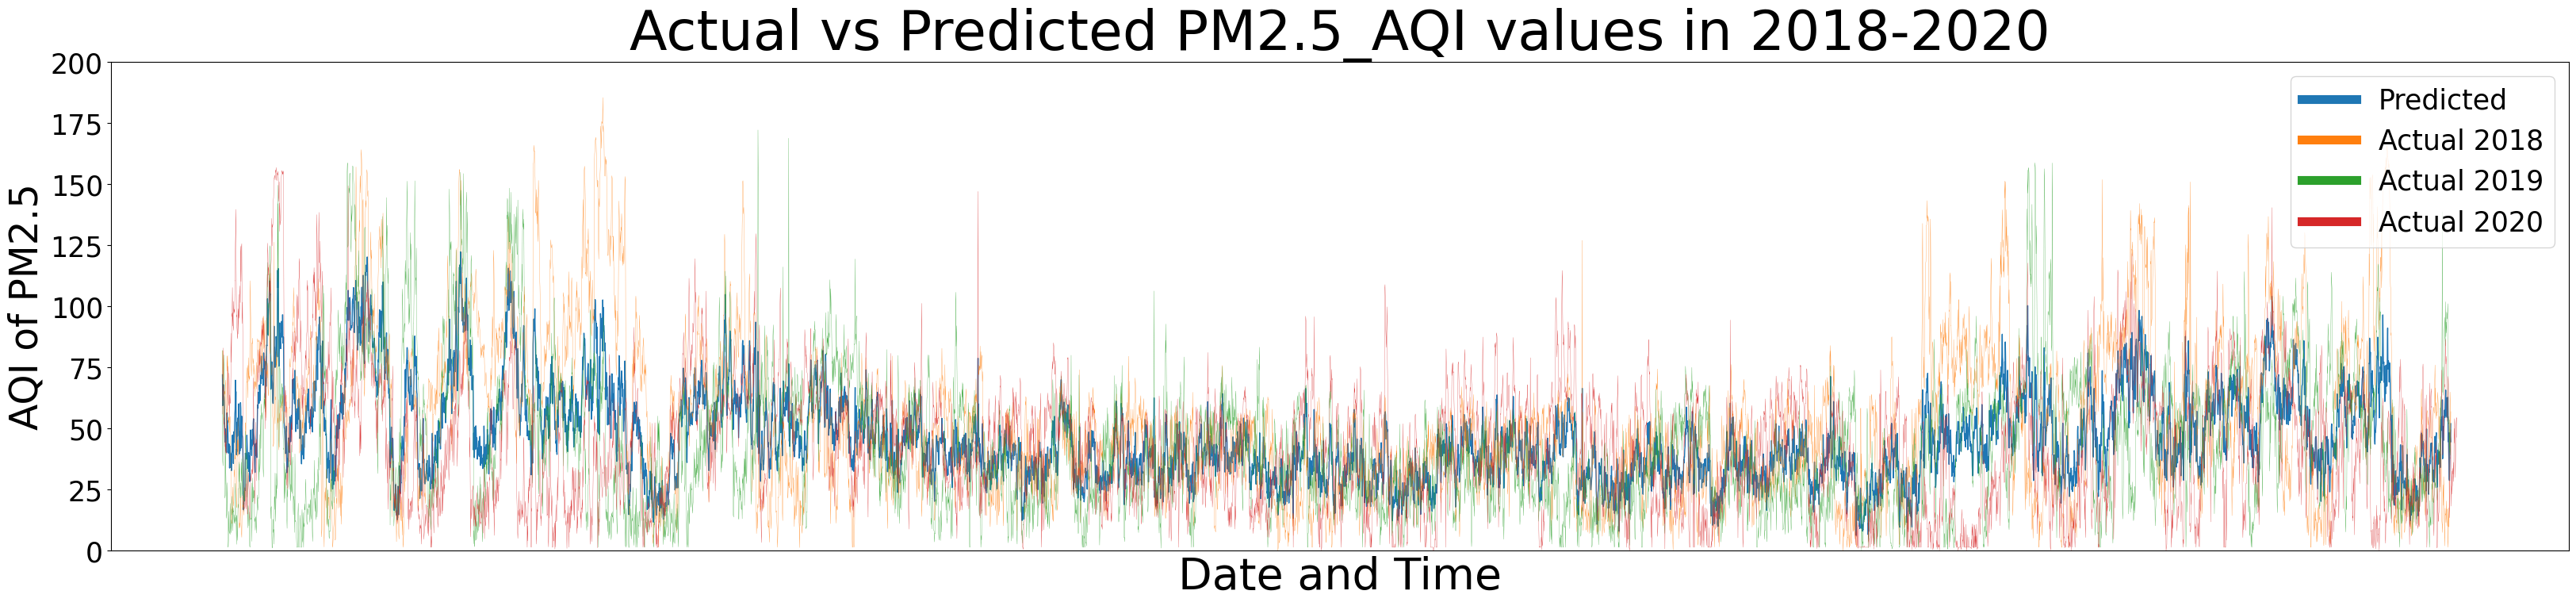

In [18]:
train_datasets = [df2018[['DateTime_ExceptYear', 'PM2.5_AQI']],\
                 df2019[['DateTime_ExceptYear', 'PM2.5_AQI']],\
                 df2020[['DateTime_ExceptYear', 'PM2.5_AQI']]]

# Plotting with test datasets (unseen datasets)
fig = plt.figure(figsize=(40,8))

sns.lineplot(x=df2021['DateTime_ExceptYear'], y=preds, linewidth=1, label='Predicted')
for i in range(0,3):
    sns.lineplot(data=train_datasets[i], x='DateTime_ExceptYear',\
             y='PM2.5_AQI', linewidth=0.2, label=f'Actual 20{18+i}')

plt.title(f'Actual vs Predicted PM2.5_AQI values in 2018-2020', fontsize=50)
plt.xlabel('Date and Time', fontsize=40)
plt.ylabel('AQI of PM2.5', fontsize=35)
plt.tick_params(axis='y', labelsize=25)

leg = plt.legend(fontsize=25, loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xticks([])
plt.xticks(visible=False)
plt.ylim(0,200)
plt.show()

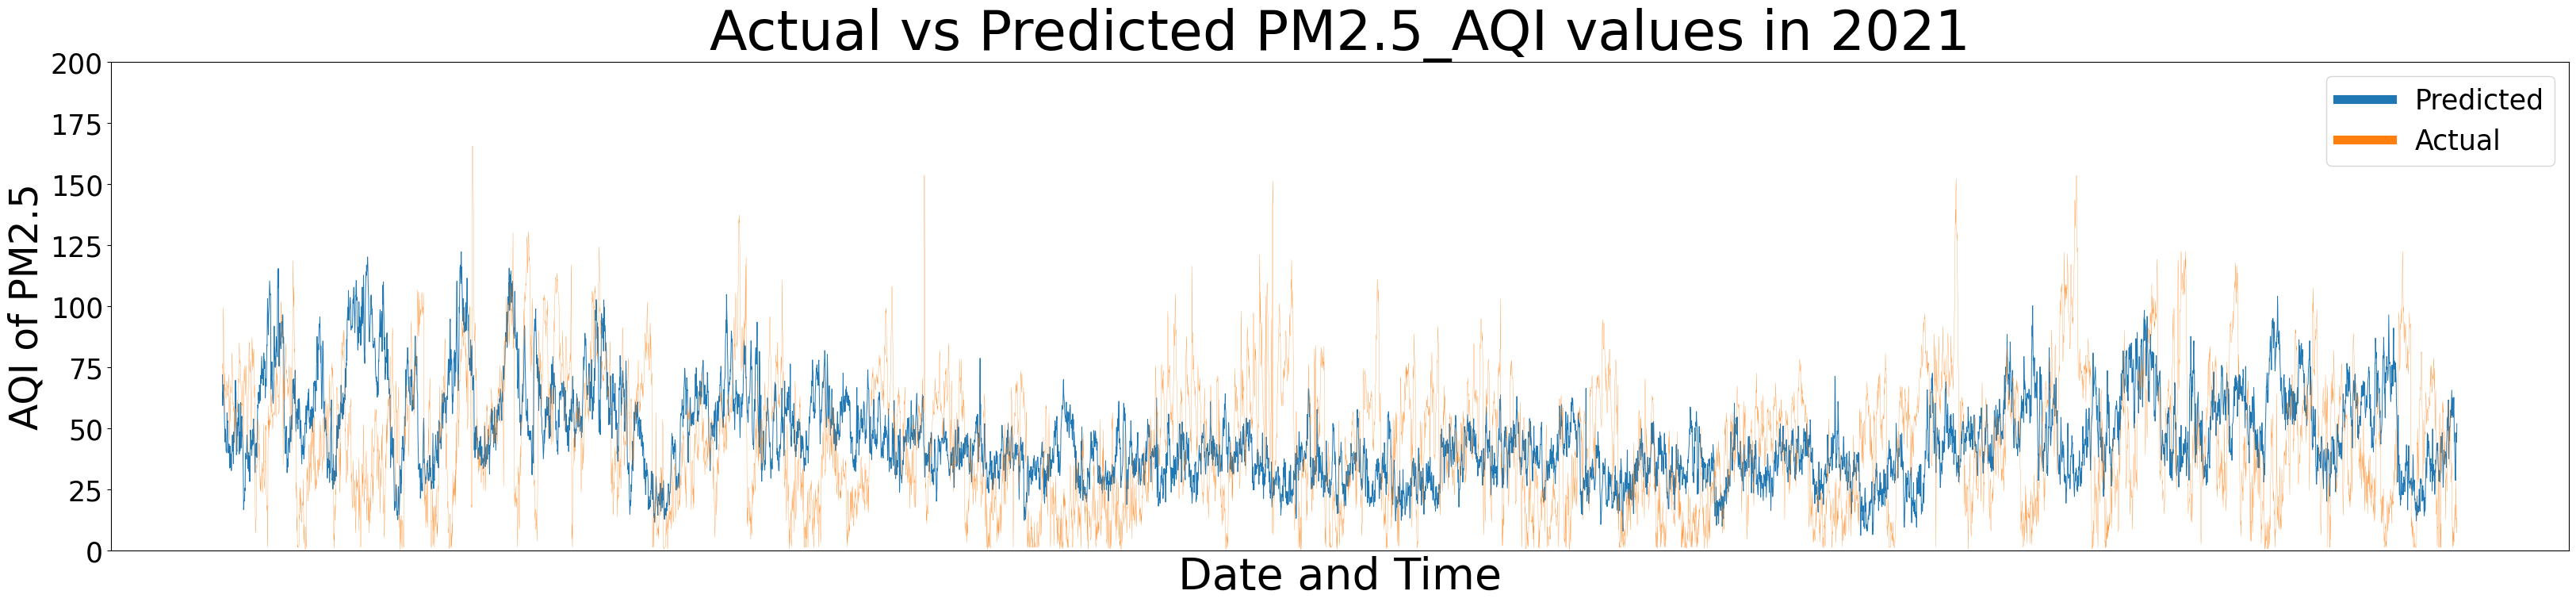

In [19]:
# Plotting with test datasets (unseen datasets)
fig = plt.figure(figsize=(40,8))
sns.lineplot(x=df2021['DateTime'], y=preds, linewidth=0.7, label='Predicted')
sns.lineplot(data=df2021[['DateTime', 'PM2.5_AQI']], x='DateTime',\
             y='PM2.5_AQI', linewidth=0.2, label='Actual')

plt.title(f'Actual vs Predicted PM2.5_AQI values in 2021', fontsize=50)
plt.xlabel('Date and Time', fontsize=40)
plt.ylabel('AQI of PM2.5', fontsize=35)
plt.tick_params(axis='y', labelsize=25)

leg = plt.legend(fontsize=25, loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xticks([])
plt.xticks(visible=False)
plt.ylim(0,200)
plt.show()

In [95]:
merged2018

DateTime        Date   Time  PM2.5_conc_med  PM2.5_AQI  \
0     01/01/2018 00:00  01/01/2018  00:00         26.7560  81.899316   
1     01/01/2018 01:00  01/01/2018  01:00         21.3350  70.547650   
2     01/01/2018 02:00  01/01/2018  02:00         22.6050  73.207051   
3     01/01/2018 03:00  01/01/2018  03:00         26.7850  81.960043   
4     01/01/2018 04:00  01/01/2018  04:00         22.0510  72.046966   
...                ...         ...    ...             ...        ...   
8755  31/12/2018 19:00  31/12/2018  19:00          9.1173  37.988750   
8756  31/12/2018 20:00  31/12/2018  20:00         18.7020  65.034103   
8757  31/12/2018 21:00  31/12/2018  21:00         16.3960  60.205299   
8758  31/12/2018 22:00  31/12/2018  22:00         10.3270  43.029167   
8759  31/12/2018 23:00  31/12/2018  23:00         14.8870  57.045427   

     AQI_Levels  
0      Moderate  
1      Moderate  
2      Moderate  
3      Moderate  
4      Moderate  
...         ...  
8755       Good  
8756   Moderate  
8757   Moderate  
8758       Good  
8759       Good  

[8760 rows x 6 columns]